In [3]:
# notebooks/02_eda_and_features.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
# === Settings ===
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# === Load data ===
data_path = Path("../data/processed/prices.csv")
prices = pd.read_csv(data_path, index_col=0, parse_dates=True)

print("📊 Data preview:")
print(prices.head())
print("\nData shape:", prices.shape)

📊 Data preview:
                 TSLA        BND         SPY
Date                                        
2015-07-01  17.943333  60.816734  174.917084
2015-07-02  18.667999  60.967102  174.756927
2015-07-06  18.648001  61.177563  174.259552
2015-07-07  17.858667  61.237701  175.355438
2015-07-08  16.997334  61.410633  172.413513

Data shape: (2535, 3)


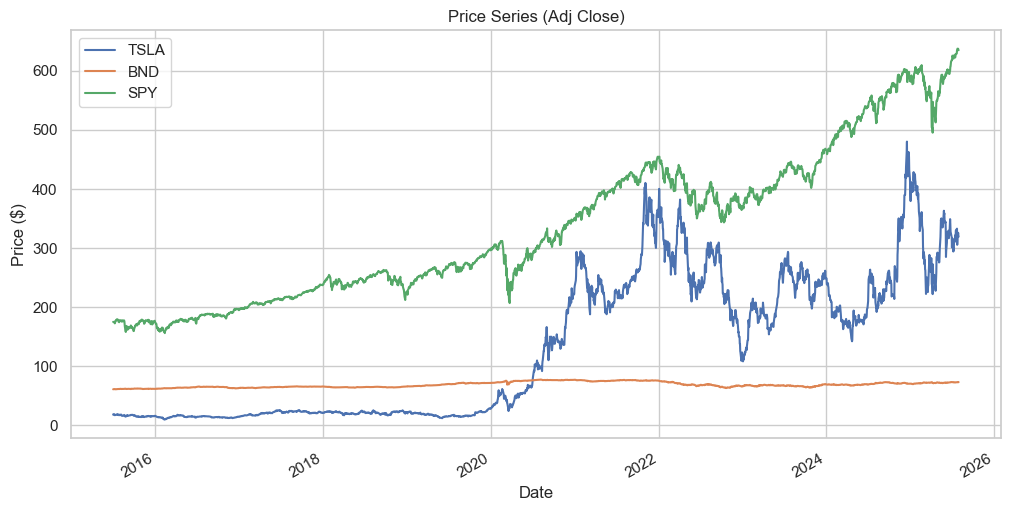

In [7]:
# === 1. Price plots ===
prices.plot(title="Price Series (Adj Close)")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.show()

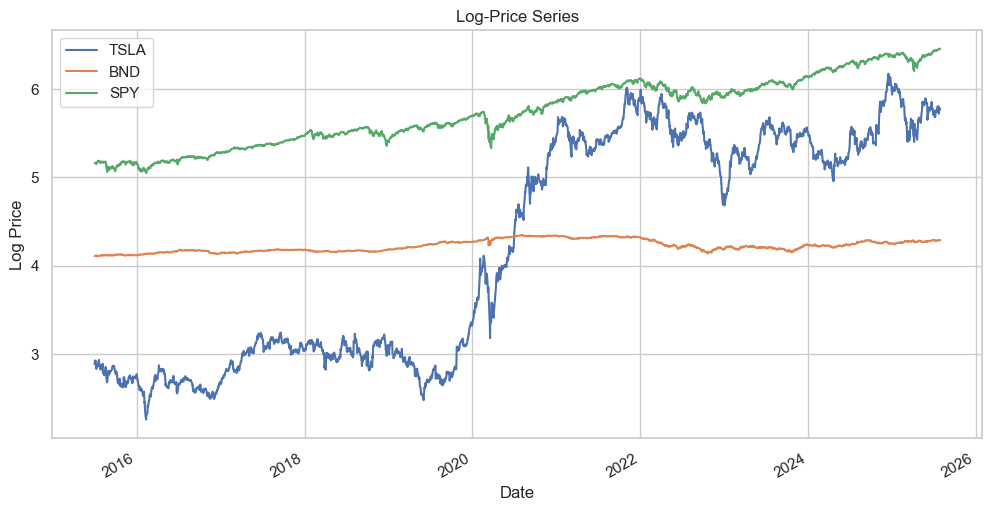

In [9]:
# === 2. Log prices ===
log_prices = np.log(prices)
log_prices.plot(title="Log-Price Series")
plt.ylabel("Log Price")
plt.show()

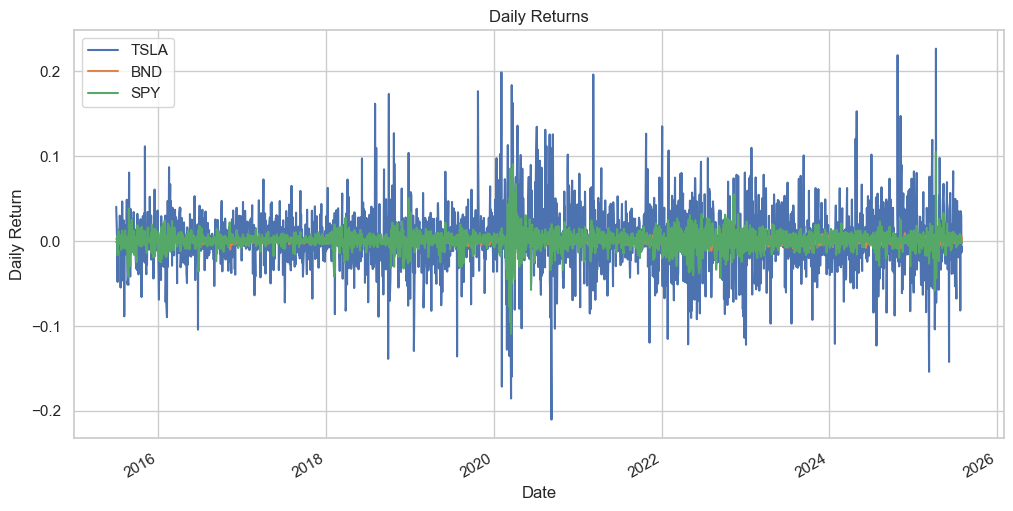

In [10]:
# === 3. Daily returns ===
returns = prices.pct_change().dropna()
returns.plot(title="Daily Returns")
plt.ylabel("Daily Return")
plt.show()


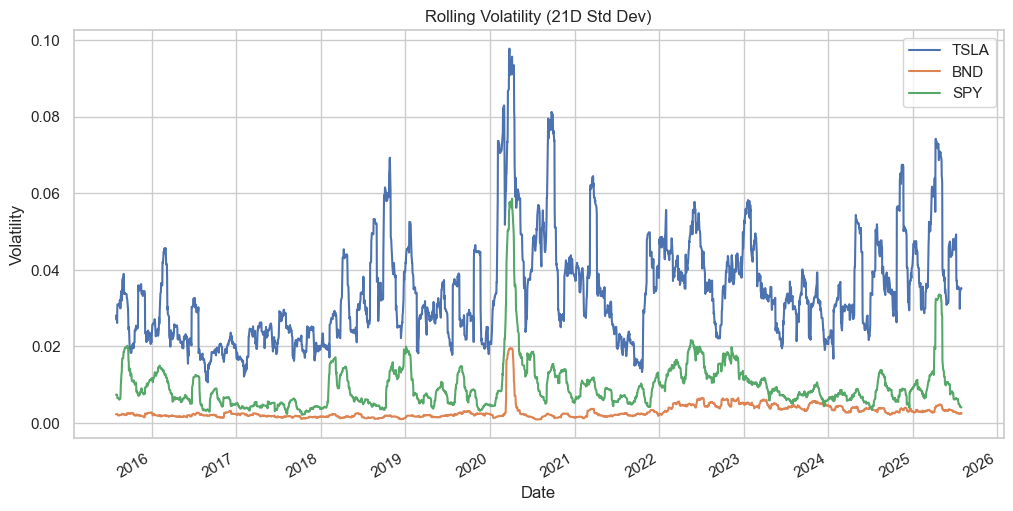

In [11]:
# === 4. Rolling volatility (21 trading days ≈ 1 month) ===
rolling_vol = returns.rolling(window=21).std()
rolling_vol.plot(title="Rolling Volatility (21D Std Dev)")
plt.ylabel("Volatility")
plt.show()

In [12]:
# === 5. Value at Risk (5%) ===
var_5 = returns.quantile(0.05)
print("\n📉 Value at Risk (5% daily):")
print(var_5)


📉 Value at Risk (5% daily):
TSLA   -0.054663
BND    -0.004900
SPY    -0.017195
Name: 0.05, dtype: float64


In [13]:
# === 6. Sharpe ratio (annualized) ===
mean_daily = returns.mean()
std_daily = returns.std()
sharpe_ratio = (mean_daily / std_daily) * np.sqrt(252)
print("\n⚡ Annualized Sharpe Ratios:")
print(sharpe_ratio)


⚡ Annualized Sharpe Ratios:
TSLA    0.778340
BND     0.356880
SPY     0.794072
dtype: float64


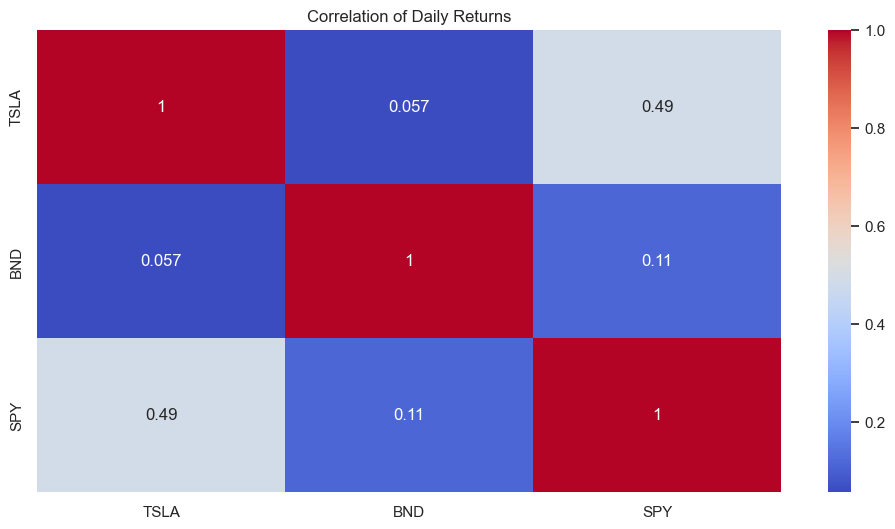

In [14]:
# === 7. Correlation heatmap ===
corr = returns.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Daily Returns")
plt.show()

In [16]:
# === 8. Save engineered features ===
features = {
    'log_prices': log_prices,
    'returns': returns,
    'rolling_vol': rolling_vol
}
for name, df in features.items():
    out_path = Path(f"../data/processed/{name}.csv")
    df.to_csv(out_path)
    print(f"💾 Saved {name} to {out_path}")

💾 Saved log_prices to ..\data\processed\log_prices.csv
💾 Saved returns to ..\data\processed\returns.csv
💾 Saved rolling_vol to ..\data\processed\rolling_vol.csv
